# Homework \#1: Analysis
*Anmol Srivastava*

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime 

In [96]:
# read csv into pandas dataframe
df = pd.read_csv('../data/Fremont_Bridge_Bicycle_Counter.csv')

# check result 
df.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,10/03/2012 12:00:00 AM,13.0,4.0,9.0
1,10/03/2012 01:00:00 AM,10.0,4.0,6.0
2,10/03/2012 02:00:00 AM,2.0,1.0,1.0
3,10/03/2012 03:00:00 AM,5.0,2.0,3.0
4,10/03/2012 04:00:00 AM,7.0,6.0,1.0


In [97]:
# adding total (e+w) bike count (note the data comes with this column)
df['My_Total'] = df['Fremont Bridge East Sidewalk'] + df['Fremont Bridge West Sidewalk']


# return datetime object version of value in date column 
def date_obj(date_str):
    
    # relevant attributes can be extracted as needed  
    return datetime.datetime.strptime(date_str, '%m/%d/%Y %I:%M:%S %p')


# adding hour: for plotting and calculations, this must go by the 24-hour system 
df['Hour'] = df.Date.apply(lambda date: date_obj(date).hour)

# adding year
df['Year'] = df.Date.apply(lambda date: date_obj(date).year)

# check results
df.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,My_Total,Hour,Year
0,10/03/2012 12:00:00 AM,13.0,4.0,9.0,13.0,0,2012
1,10/03/2012 01:00:00 AM,10.0,4.0,6.0,10.0,1,2012
2,10/03/2012 02:00:00 AM,2.0,1.0,1.0,2.0,2,2012
3,10/03/2012 03:00:00 AM,5.0,2.0,3.0,5.0,3,2012
4,10/03/2012 04:00:00 AM,7.0,6.0,1.0,7.0,4,2012


In [98]:
# convert relevant columns from original object type to float, for later 
df = df.astype({'Hour':'float64', 'Year':'float64', 'My_Total':'float64'})

# create 2016 subset of dataframe 
df_subset = df[df.Year == 2016].copy()

# check results 
df_subset.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,My_Total,Hour,Year
28440,01/01/2016 12:00:00 AM,18.0,9.0,9.0,18.0,0.0,2016.0
28441,01/01/2016 01:00:00 AM,15.0,3.0,12.0,15.0,1.0,2016.0
28442,01/01/2016 02:00:00 AM,11.0,6.0,5.0,11.0,2.0,2016.0
28443,01/01/2016 03:00:00 AM,7.0,1.0,6.0,7.0,3.0,2016.0
28444,01/01/2016 04:00:00 AM,2.0,0.0,2.0,2.0,4.0,2016.0


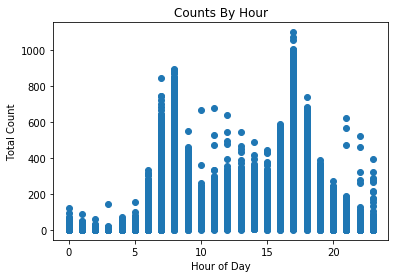

In [99]:
%matplotlib inline

# plot counts by hour
plt.scatter(x=df.Hour, y=df.My_Total)
plt.title('Counts By Hour')
plt.xlabel('Hour of Day')

# prompt says "total daily counts", I assume it should be "hourly" 
plt.ylabel('Total Count')

# display
plt.show()

In [100]:
# group by hour
groups = df.groupby(['Hour']).mean()

# finding busiest hour of day, on avg 
groups[groups.My_Total == groups.My_Total.max()]

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,My_Total,Year
Hour,,,,,
17.0,392.289003,112.514432,279.774571,392.289003,2016.001461


So, the busiest hour of the day, on average, is 17:00, or 5:00 PM.  